# Contextual write-up

The global comic book market is projected to grow from USD 9.21 billion in 2021 to USD 12.81 billion in 2028 at a CAGR of 4.8% during the 2021-2028 period... 

Read More at:-  https://www.fortunebusinessinsights.com/comic-book-market-103903

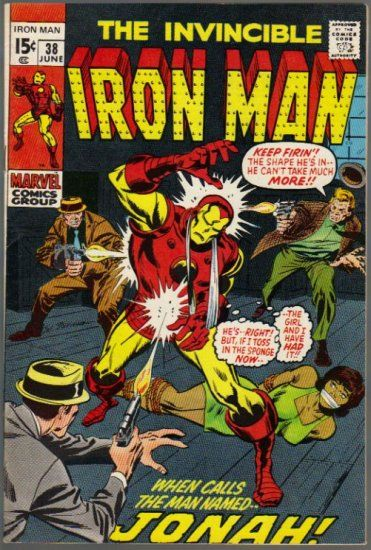

In [7]:
from IPython import display
display.Image("./Image.jpg")

### But have you ever thought about gender inequality in comics industry?

Gender inequality is discrimination on the basis of sex or gender causing one sex or gender to be routinely privileged or prioritized over another. Gender equality is a fundamental human right and that right is violated by gender based discrimination. And to address this issue, I want to take an often overlooked industry - Comics. 

Quite often, when we speak about empowering or uplifting women, we tend to look at stats on very obvious metrics such as average salary, number of women in executive level positions, politicians and decision makers. But, comics have existed for a quite a long time (Published in 1897, The Yellow Kid in McFadden's Flats is considered to be the first comic book, insomuch that it bore the phrase “comic book” on its back cover). and many a times reflect the trends in the society. I want to explore how comics evolved over time, focusing specifically on **gender inequality.** 

# Finding the dataset


Dataset: https://www.kaggle.com/datasets/dannielr/marvel-superheroes

**For 381 unique Marvel characters, this data contains the following fields:**

Attributes: (categorical)
* Stats: score for intelligence, durability, speed etc. (numerical)
* Power: whether or not the character has a given power - e.g. cold resistance (boolean/string - True/False)
* There are blank fields (about 40-45 instances per column) for some of the power and stats fields

The key datasets I am planning to use are:

* marvelcharactersinfo.csv (for physical attributes like gender, eye color, skin color)
* characters_stats.csv (stats like intelligence)
* superheroespowermatrix.csv (powers like telepathy, flight, empathy, cold resistance etc.)

In [8]:
# I am attempting to read the dataset from Kaggle API directly to download it to my local drive and read it from there

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [2]:
api.dataset_download_files('dannielr/marvel-superheroes')

In [3]:
from zipfile import *
zf = ZipFile('marvel-superheroes.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()
zf.namelist()

['characters.csv',
 'charactersToComics.csv',
 'charcters_stats.csv',
 'comics.csv',
 'marvel_characters_info.csv',
 'marvel_dc_characters.csv',
 'marvel_dc_characters.xlsx',
 'superheroes_power_matrix.csv']

In [12]:
import pandas as pd
characters=pd.read_csv('characters.csv', encoding= 'unicode_escape')
charactersToComics=pd.read_csv('charactersToComics.csv', encoding= 'unicode_escape')
charcters_stats=pd.read_csv('charcters_stats.csv', encoding= 'unicode_escape')
comics=pd.read_csv('comics.csv', encoding= 'unicode_escape')
marvel_characters_info=pd.read_csv('marvel_characters_info.csv', encoding= 'unicode_escape')
marvel_dc_characters=pd.read_csv('marvel_dc_characters.csv', encoding= 'unicode_escape')
superheroes_power_matrix=pd.read_csv('superheroes_power_matrix.csv', encoding= 'unicode_escape')

In [192]:
characters.head()

,ID,Name,Identity,Alignment,EyeColor,HairColor,Gender,Status,Appearances,FirstAppearance,Year,Universe
0,100001,Claude Potier (Earth-616),Secret,Neutral,Hazel,Brown,Male,Living,2.0,àå÷-00,2000.0,DC
1,100002,Elektra Natchios (Earth-616),Secret,Neutral,Blue,Black,Female,Living,280.0,éðå-81,1981.0,Marvel
2,100003,Thomas Williams (Earth-616),Secret,Neutral,Black,NaN,Male,Living,1.0,àåâ-02,2002.0,DC
3,100004,Mogul (Earth-616),NaN,NaN,NaN,Bald,NaN,Living,NaN,îàé-70,1970.0,DC
4,100005,Denise Havens (Earth-616),Secret,Good,Brown,Black,Female,Living,4.0,éðå-95,1995.0,DC


In [14]:
charcters_stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


#### Super Interesting dataset indeed!

# Data Handling

In [17]:
#Missing Value identification

In [16]:
print(characters.isnull().sum() / len(characters) * 100)

characterID    0.0
name           0.0
dtype: float64


In [ ]:
print(characters.isnull().sum() / len(characters) * 100)

##### No missing values in characters dataset

In [28]:
print(charcters_stats.isnull().sum() / len(charcters_stats) * 100)

Name            0.000000
Alignment       0.490998
Intelligence    0.000000
Strength        0.000000
Speed           0.000000
Durability      0.000000
Power           0.000000
Combat          0.000000
Total           0.000000
dtype: float64


##### Alignment has 0.5% of the datapoints missings. At this stage, it can be ignored.

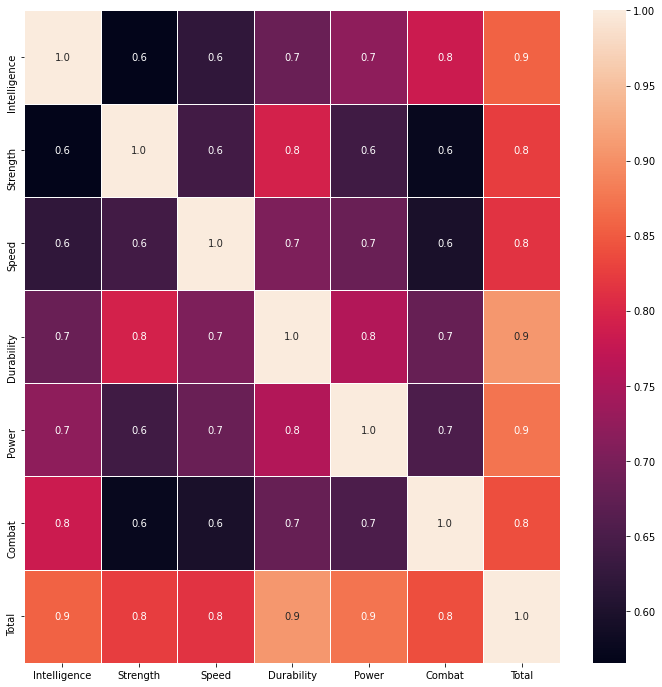

In [30]:
#Visulation whit seaborn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(charcters_stats.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

##### Strength and Durability have high correlation among them. Intelligence and Combat are the other pair with higher correlation too!

           count        mean    sum
Alignment                          
bad          165  247.212121  40790
good         432  214.990741  92876
neutral       11  355.363636   3909


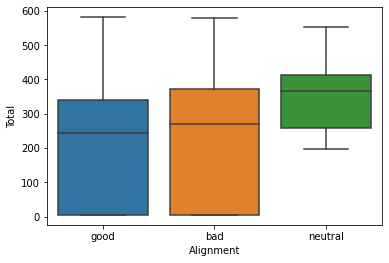

In [32]:
##Group by alignment and aggregate total powers.
print(charcters_stats.groupby(by='Alignment').agg(['count','mean','sum'])['Total'])

sns.boxplot(x='Alignment',
           y='Total',
           data=charcters_stats);

##### Total power of good ones are greater than the bad ones. But if we do this comparison by average power of good and bad ones; an average bad character has more power than a average good one.


C:\Users\nittalab\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nittalab\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Bad')

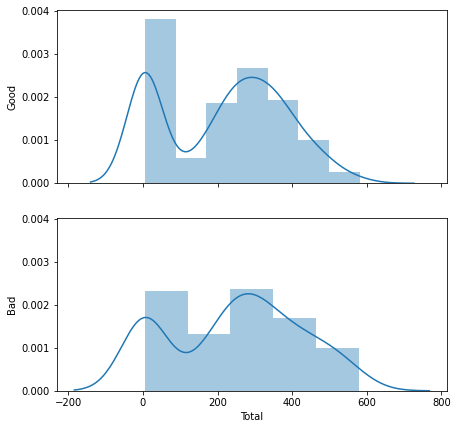

In [33]:
# Let's look at it in different way. Let's plot a histogram and see the distribution between 'good' and 'bad' characters.

#Creating two filters to find good and bad characters.
filterGood=charcters_stats['Alignment'].isin(['good'])
filterBad=charcters_stats['Alignment'].isin(['bad'])

#Creating a figure for 2 plots
f,(ax1,ax2)=plt.subplots(2,1,figsize=(7,7), sharex=True, sharey=True)

#Plot the data and show the distribution
sns.distplot(charcters_stats[filterGood]['Total'],ax=ax1)
ax1.set_ylabel("Good")
sns.distplot(charcters_stats[filterBad]['Total'],ax=ax2)
ax2.set_ylabel("Bad")

#### Let's plot one more graph on the timeseries of the comics before we deep dive into our topic of interest - gender inequality

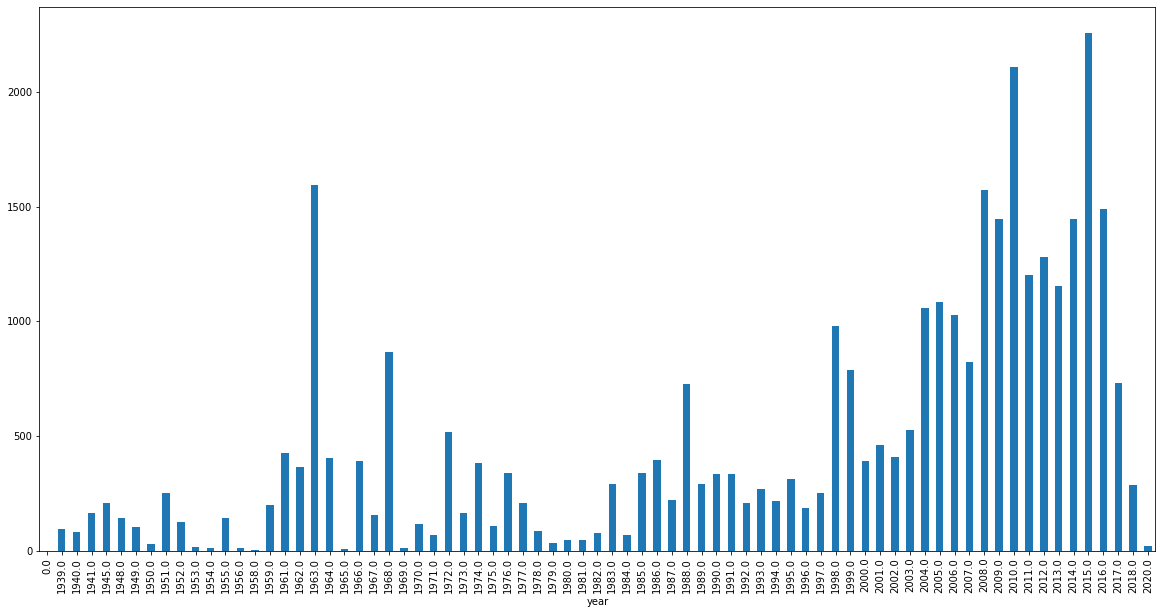

In [37]:
##Finding year of the comics
### First, creating a function to extract the year from comics title column
def extractYear(txt):
    startChr=txt.find('(')+1
    endChr=txt.find(')')
    try:
        result=int(txt[startChr:endChr])
        return result
    except:
        pass
    
###Creating a copy of comics data frame
comicsWyear=comics.copy()

###applying extractYear function and creating a new column that contains year of the comics
comicsWyear['year']=comics['title'].apply(extractYear)

### creating a bar chart
comicsWyear.groupby(by='year').count()['comicID'].plot(kind='bar',figsize=(20,10));

#### The number of comics have increased with time with few spikes observed in few specific years such as 1963, 1968, 1988, 1998 

# Data Presentation: Storyline

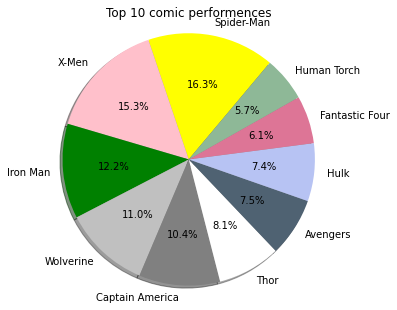

In [106]:
superhero_comic_performences = pd.merge(charactersToComics,characters,on='characterID')['name'].value_counts()

top_10 = superhero_comic_performences.nlargest(10)
labels = top_10.index.tolist()
sizes = top_10.values
colors = ['Yellow', 'Pink', 'Green', 'Silver', 'Grey','White','#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=50)
plt.axis('equal')
plt.title("Top 10 comic performences")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

#### A simple table is enough to understand that there is no female character in the top 10 most performances/apperances comic. This is the core issue of the gender inquality. Let's further deep dive into different Universes to understand Gender parity

<AxesSubplot:ylabel='ID'>

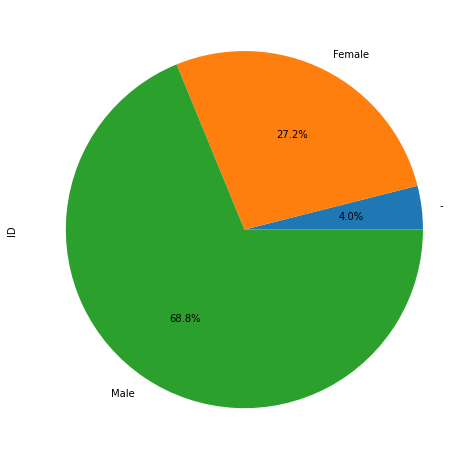

In [147]:
## First, find number of participants in comics
marvel_characters_info.groupby(by=['Gender'])['ID'].count().plot(kind='pie',figsize=(8,10)
        ,autopct='%1.1f%%')

#### Not just in the top comic apperances but also in the total representation across publishers, there is only 27% female representation

In [161]:
### Let's combine character statistics with marvel charcters info to further analyze this trend

In [172]:
marvel_stats = marvel_characters_info.merge(charcters_stats, on = 'Name')
marvel_stats.shape

(600, 19)

In [164]:
# Total 11 rows were lost during this merge but it should be fine to understand larger picture

In [165]:
marvel_stats.columns

Index(['ID', 'Name', 'Alignment_x', 'Gender', 'EyeColor', 'Race', 'HairColor',
       'Publisher', 'SkinColor', 'Height', 'Weight', 'Alignment_y',
       'Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat',
       'Total'],
      dtype='object')

In [168]:
marvel_stats_male = marvel_stats[marvel_stats.Gender == 'Male']
marvel_stats_female = marvel_stats[marvel_stats.Gender == 'Female']

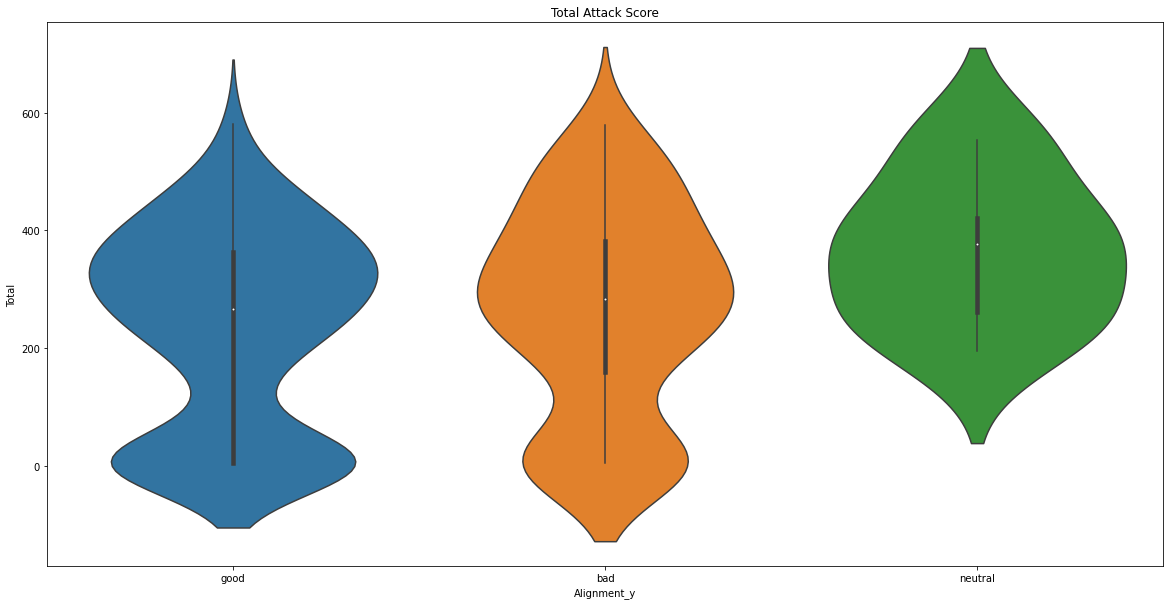

In [181]:
# Male chart
plt.subplots(figsize = (20,10))
plt.title('Total Attack Score')
sns.violinplot(x = "Alignment_y", y = "Total",data = marvel_stats_male)
plt.show()

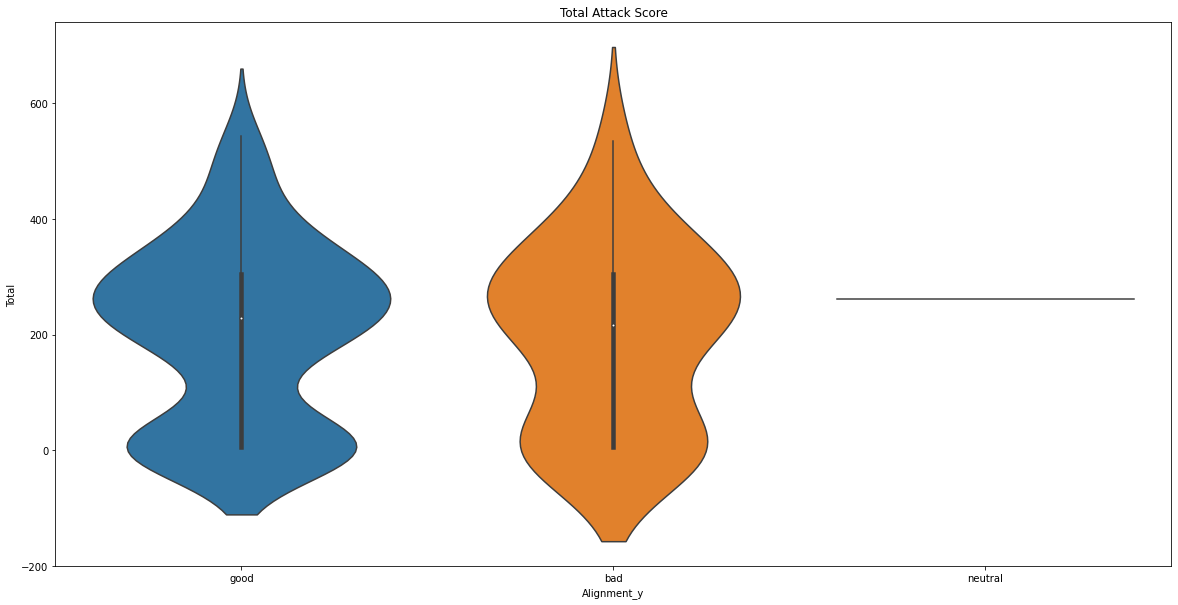

In [182]:
# Female chart
plt.subplots(figsize = (20,10))
plt.title('Total Attack Score')
sns.violinplot(x = "Alignment_y", y = "Total",data = marvel_stats_female)
plt.show()

### From these violin plots we see unnecessary genderization where Male there seemed to be more Male characters among Villians compared to Female and there are literally no neutral characters in female comics

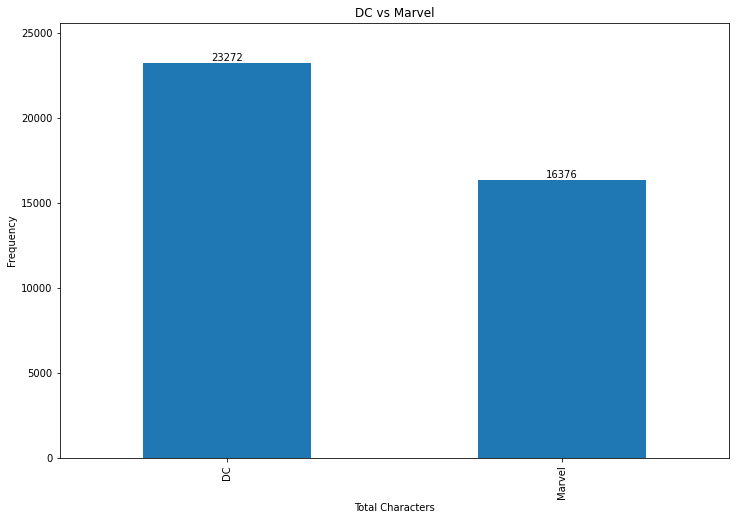

In [210]:
# Let's understand if these parities are different in 2 Top known Universes: DC and Marvel
import matplotlib.ticker as mtick
marvel_and_dc_characters_only = marvel_dc_characters[marvel_dc_characters.Universe.isin(["Marvel","DC"])]
universe_based_count = marvel_and_dc_characters_only.groupby('Universe')['Universe'].count()
ax = universe_based_count.plot(kind='bar',figsize=(12, 8), title='DC vs Marvel',
             xlabel='Total Characters', ylabel='Frequency', legend=False)
# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [198]:
## Overall DC has more characters than Marvel but...

DC


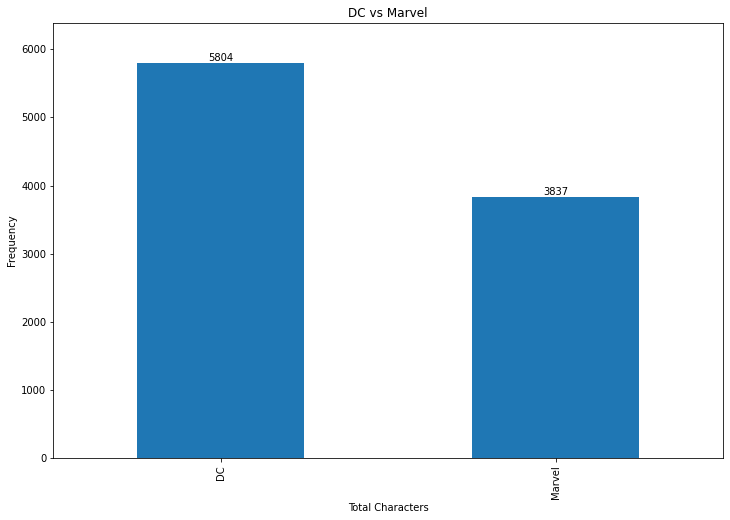

In [213]:
marvel_and_dc_characters_only = marvel_dc_characters[marvel_dc_characters.Universe.isin(["Marvel","DC"])]
marvel_vs_dc_woman=marvel_and_dc_characters_only[marvel_and_dc_characters_only['Gender']=='Female'].groupby('Universe')['Universe'].count()
if (marvel_vs_dc_woman.DC > marvel_vs_dc_woman.Marvel):
    print ("DC") 
elif (marvel_vs_dc_woman.DC < marvel_vs_dc_woman.Marvel):
    print ("MARVEL")
else:
    print ("EQUAL")

ay = marvel_vs_dc_woman.plot(kind='bar',figsize=(12, 8), title='DC vs Marvel',
             xlabel='Total Characters', ylabel='Frequency', legend=False)
# annotate
ay.bar_label(ay.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ay.margins(y=0.1)

##### 25% of the DC characters are Femaile whereas 23.4% of Marvel characters are Female. DC is doing marginally better! 
##### No-wonder the strongest Female lead comic I am aware of is Wonder Women from DC and can't think of Captain Marvel immediately :)

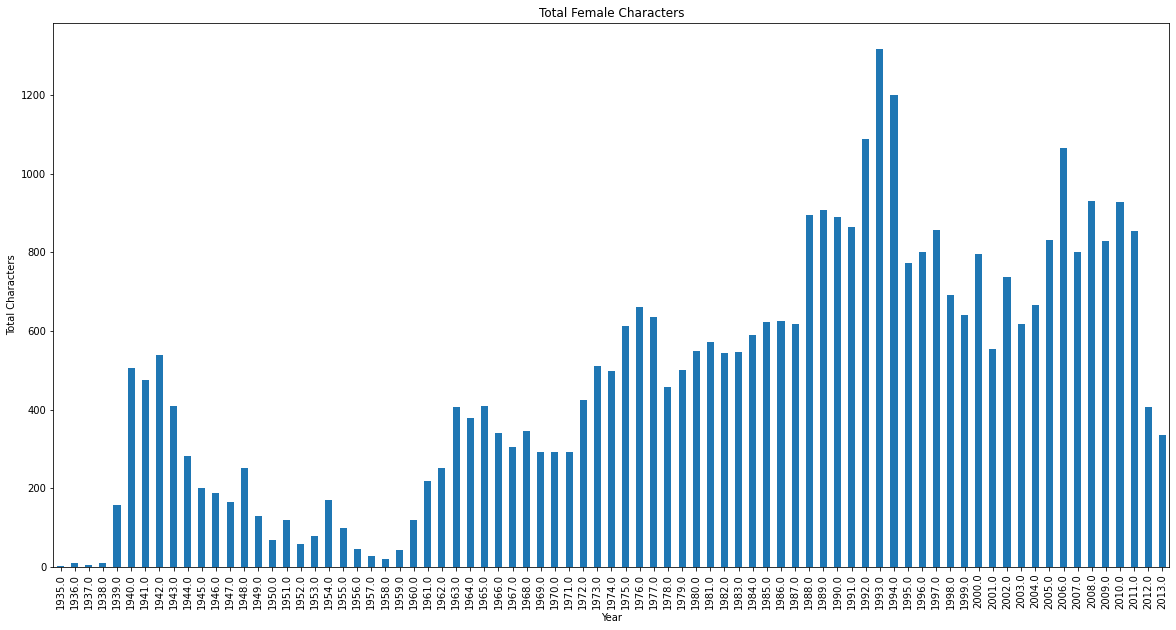

In [221]:
marvel_and_dc_characters_only.groupby(by='Year').count()['ID'].plot(kind='bar',figsize=(20,10), title='Total Female Characters',
             xlabel='Year', ylabel='Total Characters', legend=False);

### With gender equality being recognized more broadly the trend is improving over time. This is a positive trend and would like to see more Women superheroes in the comics and real life. And also proactively recognizing the need for it and taking active measures is need of the hour. 